# Random numbers

Python activities to complement *Measurements and their Uncertainties* (*MU*), Chapter 1, "Errors in the physical sciences."

Author: J. S. Dodge, 2019©

*Note:* NumPy 1.17.0 made several changes to its random number generation routines, including changes to its default RNG algorithm. This notebook is based on NumPy 1.16, since that is what the SFU Syzygy server is using at the time of writing, and subsequent versions should be backward-compatible. Once Syzygy adopts NumPy 1.17, however, this notebook should be revised. –JSD, August 2019

* [Random number generation](#Random-number-generation)
    * [Exercise 1](#Exercise-1)
    * [Computational example](#Computational-example)
        * [Programming notes 1](#Programming-notes-1)
        * [Programming notes 2](#Programming-notes-2)
    * [Plot the results](#Plot-the-results)
        * [Programming notes 3](#Programming-notes-3)
    * [Modern random number generators](#Modern-random-number-generators)
    * [Exercise 2](#Exercise-2)
    * [Random numbers with NumPy](#Random-numbers-with-NumPy)
        * [Programming notes 4](#Programming-notes-4)
* [Histograms](#Histograms)
    * [Basic histogram of `rand`](#Basic-histogram-of-rand)
    * [Histogram options in Matplotlib](#Histogram-options-in-Matplotlib)
        * [Programming notes 5](#Programming-notes-5)
    * [Alternative histograms of `rand`](#Alternative-histograms-of-rand)
    * [Exercise 3](#Exercise-3)
    * [Exercise 4](#Exercise-4)
    * [Exercise 5](#Exercise-5)
* [Summary](#Summary)
* [Further reading](#Further-reading)

## Preliminaries
Before proceeding with this notebook you should read *MU* Ch. 1, "Errors in the physical sciences," with the following [goals](https://wiki.its.sfu.ca/departments/phys-students/index.php/Reading_goals_for_Hughes_and_Hase#Errors_in_the_physical_sciences) in mind.

1. Be able to explain what the following terms mean and be able to provide representative examples:
    1. An accurate measurement;
    2. A precise measurement;
    3. Random errors/uncertainty;
    4. Systematic errors/uncertainty;
    5. Mistakes.

## Random number generation

Random number generators (RNGs) are widely used in statistics, experimental simulation, and even in certain types of theoretical calculations. We'll be using the random number generator routines in NumPy to simulate experimental data and to develop an intuition for statistical analysis. You might wonder how a computer, a completely deterministic machine, can generate random numbers. The short answer is that it does not; the functions use algorithms that are cleverly designed to produce numbers that satisfy most statistical requirements associated with randomness, but actually follow a well-defined sequence. If this sounds strange, you are not alone: the great 20th century mathematician John von Neumann [wrote](https://babel.hathitrust.org/cgi/pt?id=osu.32435030295547&view=image&seq=48), "Anyone who considers arithmetical methods of producing random digits is, of course, in a state of sin."

Von Neumann was in a position to know: he is credited with developing the first algorithm to generate random numbers with the [first general-purpose computer](https://en.wikipedia.org/wiki/ENIAC), although there is some evidence that his [middle-square method](https://en.wikipedia.org/wiki/Middle-square_method) first appeared in the 13th century. This method is obsolete now, but it illustrates some important principles of modern random number generators, so we will describe it here for the case of generating a random sequence of integers from 0 to 9999 (the original application involved 10-digit integers, from 0 to 9999999999).

1. Start by choosing a number from 0 to 9999, which we call the *seed*. This will be the first number, $n_1$, in our sequence.
2. For all subsequent numbers $\{n_2,\ldots,n_i,n_{i+1},\ldots\}$, the element $n_{i+1}$ is given by *the middle four digits* of $n_i^2$ after prepending it with as many zeros as necessary to form an eight-digit number; for example, if $n_1 = 1862$, then $n_1^2 = 3467044$, which we write as 03<u>4670</u>44, so $n_2 = 4670$. This is an example of a mathematical [recurrence relation](https://en.wikipedia.org/wiki/Recurrence_relation), in which element $n_{i+1}$ of the sequence is defined by the preceding term, $n_{i}$.

All modern random number generators have this basic structure: a nonrandom *seed* that initiates the sequence, and a *recurrence relation* that generates all subsequent elements in the sequence, which should be indistinguishable from a random sequence if the algorithm is any good. Despite this appearance of randomness, however, the sequence is perfectly reproducible once the seed has been specified, so often they are called *pseudorandom* numbers to distinguish them from their purer counterparts.

### Exercise 1
Find $n_3$ and $n_4$ in the sequence $\{n_1 = 1862, n_2 = 4670, n_3, n_4, \ldots\}$ produced by the middle-square method with $n_1 = 1862$ as the seed.

In [1]:
# Code cell for Exercise 1
# Use this cell for your response, adding cells if necessary.
# You can check your result by comparing it with the output
# of the subsequent cells.

### Computational example
The recurrence relation makes it easy to generate a pseudorandom sequence automatically, as shown in the next two code cells. The first code cell shows the computational steps for one iteration of the recurrence relation. The second code cell embeds these computational steps in a `for` loop to produce a sequence with 50 elements automatically.

#### Programming notes 1
The computations in the following cells rely on routines from the [NumPy](https://www.numpy.org/) library, which we load in the first line of the cell below. The syntax `import numpy as np` tells Python to import the NumPy library and use the alias `np` to refer to it. After importing the library, we can then use any of its routines by prepending the routine name with `np`, separated by a period (`.`). For example, in Step 2 below, we use `np.remainder` to use the [`remainder`](https://www.numpy.org/devdocs/reference/generated/numpy.remainder.html) routine, and we use `np.trunc` to use the [`trunc`](https://www.numpy.org/devdocs/reference/generated/numpy.trunc.html) routine. The [NumPy documentation](https://www.numpy.org/devdocs/reference/index.html) lists all of its routines.

In [2]:
# Load NumPy for the computations
import numpy as np

# Choose the seed
n1 = 1862
print("First term, n1:")
print(n1)
print()

# Step 1: Square  n1
step1 = n1**2
print("Square of n1:")
print(step1)
print()

# Step 2: Divide by 1e6 and take the remainder to
# determine the last six digits of n1**2.
step2 = int(np.remainder(step1, 1e6))
print("Last six digits of n1**2:")
print(step2)
print()

# Step 3: Divide by 1e2 and truncate the result to
# drop the last two digits to get the middle four digits
step3 = int(np.trunc(step2/1e2))
print("Middle four digits of n1**2:")
print(step3)
print()

# Compose the operations in one line to compute n2 directly from n1
n2 = int(np.trunc(np.remainder(n1**2, 1e6)/100))
print("Second term, n2:")
print(n2)

First term, n1:
1862

Square of n1:
3467044

Last six digits of n1**2:
467044

Middle four digits of n1**2:
4670

Second term, n2:
4670


#### Programming notes 2
The following cell includes some new NumPy routines that merit explanation.

The [`zeros`](https://www.numpy.org/devdocs/reference/generated/numpy.zeros.html) routine initializes an array and fills it with zeros. In the specific case here, the input to `zeros` is a single number, `N = 50`, so the array is one-dimensional with length `N`. We do this because we plan to fill the array in the subsequent `for` loop, and it is good practice to preallocate the memory for the array before filling it—otherwise, a new block of memory must be allocated each time the `for` loop adds a new array element.

The [`arange`](https://www.numpy.org/devdocs/reference/generated/numpy.arange.html) creates an array with evenly spaced values. Here, `arange(1,N)` returns the array `[1, 2, ..., N-1]`, starting at the first input (`1`) and increasing with the default increment (`1`) until the next value would exceed or be equal to the second input (`N`).

In [3]:
# Initialize a one-dimensional array of length N
N = 50
x  = np.zeros(N)

# Assign the seed to the first element in the array
# and use the recurrence relation to compute the rest
x[0] = 1862
for i in np.arange(1, N):
    x[i] = int(np.trunc(np.remainder(x[i-1]**2, 1e6)/100))

# Print the first four elements to compare with the results
# of the previous exercise
print(x[:4])

[1862. 4670. 8089. 4319.]


### Plot the results
Plotting all 50 values reveals an important weakness of the middle square method: the sequences tend to evolve into a repeating pattern. With 1862 as the seed, the 29th element of the sequence is zero, so every subsequent element is also zero!

#### Programming notes 3
We use the [pyplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html) module of the [Matplotlib](https://matplotlib.org/) library to produce the plot.

The first line imports `pyplot` from the `matplotlib` library and assigns it the alias `plt`.

The second line is an example of a [magic command](https://ipython.readthedocs.io/en/stable/interactive/magics.html), which is specific to the Interactive Python kernel that provides the interface between Python and the Jupyter notebook interface. This one, `%matplotlib inline`, tells the notebook server to render plots as a static images inside the notebook interface. This command only needs to be invoked once during a single Jupyter notebook session.

The third line uses the [arange](https://www.numpy.org/devdocs/reference/generated/numpy.arange.html) NumPy routine to create an array of `N` integers `[0, 1, ..., N-1]` and assign it to the variable `i`.

The remaining lines produce the plot. The [`plot`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) routine from pyplot makes a [`plot`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) of `x` as a function of `i` with black circles as markers (`ko`, where `k` indicates the color blac<u>k</u> and `o` indicates circular markers). The axis labels are then set by the [`xlabel`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html) and [`ylabel`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ylabel.html) routines. Note the semicolon at the end: this is used to suppress the output of `ylabel`. Delete it and run the cell again to see what happens when it is omitted.

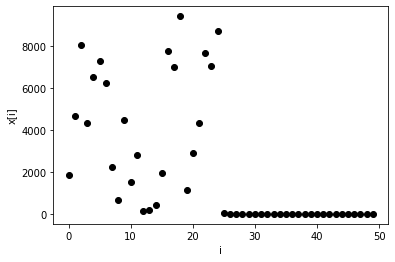

In [4]:
# Load pyplot from Matplotlib
import matplotlib.pyplot as plt

# Tell the Jupyter notebook server to show plots in the notebook.
%matplotlib inline

# Create array i = [0, 1, ..., N-1], then
# plot x versus i using black circles as markers ('ko');
# assign labels to the x and y axes; and finish with a semicolon
# to suppress the output of the ylabel routine.
i = np.arange(N)
plt.plot(i, x, 'ko') 
plt.xlabel('i')
plt.ylabel('x[i]');

### Modern random number generators

This example demonstrates a lesson articulated by the celebrated computer scientist [Donald Knuth](#Knuth):

> Random numbers should not be generated with a method chosen at random. Some theory should be used.

Random number generation is now an active field of research in mathematics and computer science, so we will leave the interested reader to explore the [literature](#Refs) to understand how modern RNGs work. An algorithm widely used today, including many of the standard Python libraries, is known as the [Mersenne Twister](https://en.wikipedia.org/wiki/Mersenne_Twister), which was published in 1997 by Makoto Matsumoto and Takuji Nishimura. It produces pseudorandom sequences of floating-point numbers that are uniformly distributed over \[0.0, 1.0). These sequences are periodic, with a period of 2<sup>19937</sup>–1 elements—infinite, for all practical purposes. The number 2<sup>19937</sup>–1 is a *Marsenne prime*, which are prime numbers of the form 2<sup>*n*</sup>–1. Prof. Matsumoto [explains](http://www.math.sci.hiroshima-u.ac.jp/~m-mat/MT/ename.html) how he and his colleague arrived at the algorithm name on the [Marsenne Twister Home Page](http://www.math.sci.hiroshima-u.ac.jp/~m-mat/MT/emt.html). (Don Knuth famously [does not use email](https://www.youtube.com/watch?v=QS8qwMna8_o), which is why they refer to letters from him.)

> MT was firstly named "Primitive Twisted Generalized Feedback Shift Register Sequence" by a historical reason. 
> 
> Makoto: Prof. Knuth said in his letter "the name is mouthful."
> Takuji:........
> 
> a few days later
>
> Makoto: Hi, Takkun, How about "Mersenne Twister?" Since it uses Mersenne primes, and it shows that it has its ancestor Twisted GFSR.
>
> Takuji: Well.
>
> Makoto: It sounds like a jet coaster, so it sounds quite fast, easy to remember and easy to pronounce. Moreover, although it is a secret, it hides in its name the initials of the inventors.
>
> Takuji:.......
>
> Makoto: Come on, let's go with MT!
>
> Takuji:....well, affirmative.
> 
> Later, we got a letter from Prof. Knuth saying "it sounds a nice name." :-) 

### Exercise 2
In the cell below, express 2<sup>19937</sup>–1 in scientific notation with 5 significant figures, and compare this to the age of the universe ($13.772\times 10^9$ years) in seconds.

*Hint:* It is possible to do this with just a hand calculator.

In [5]:
# Code cell for Exercise 2
# Use this cell for your response, adding cells if necessary.

### Random numbers with NumPy
NumPy has an entire module for random numbers, called [`random`](https://www.numpy.org/doc/1.16/reference/routines.random.html). Within this module, the routine [`rand`](https://www.numpy.org/doc/1.16/reference/generated/numpy.random.rand.html) returns random numbers that are uniformly distributed over \[0.0, 1.0). NumPy used the Marsenne Twister algorithm until it reached version 1.17.0, when newer, better algorithms were available. The current default (as of version 1.18) is the [PCG64](https://www.numpy.org/devdocs/reference/random/bit_generators/pcg64.html) algorithm (short for Parallel Congruent Generator with 64-bit output), published in 2014 by Melissa O'Neill.

#### Programming notes 4
In addition to `rand`, there are several equivalent routines that produce uniformly distributed random numbers, including [`random_sample`](https://www.numpy.org/doc/1.16/reference/generated/numpy.random.random_sample.html), [`random`](https://www.numpy.org/doc/1.16/reference/generated/numpy.random.random.html), [`ranf`](https://www.numpy.org/doc/1.16/reference/generated/numpy.random.ranf.html), and [`sample`](https://www.numpy.org/doc/1.16/reference/generated/numpy.random.sample.html). They're all basically the [same](https://stackoverflow.com/questions/18829185/difference-between-various-numpy-random-functions).

Run the following cell a few times.

In [6]:
# Import the random module
from numpy import random

# Print some random numbers
print(random.rand())
print(random.rand())
print(random.rand())
print(random.rand())

0.6600437783446194
0.2579773242723954
0.6087412977896483
0.5287420258326573


Notice that you get different results every time you run this cell. We can use the [`random.seed`](https://www.numpy.org/doc/1.16/reference/generated/numpy.random.seed.html#numpy.random.seed) routine to generate reproducible results, as you will see if you run the following cell multiple times (you should also try changing the seed).

In [7]:
# Set the seed (must be an integer from 0 to 2**32-1)
random.seed(0)

# Print some random numbers
print(random.rand())
print(random.rand())
print(random.rand())
print(random.rand())

0.5488135039273248
0.7151893663724195
0.6027633760716439
0.5448831829968969


Frequently we will want an *array* of random numbers, not just one at a time. We can pass the desired array size as an input argument to `rand` to produce such an array.

[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
 0.43758721 0.891773   0.96366276 0.38344152]


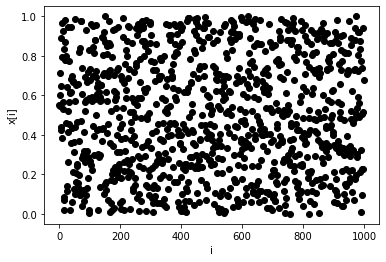

In [8]:
# Set the array length
N  = 1000

# Reset the seed and generate the array
random.seed(0)
x = random.rand(N)

# Print the first 10 values
print(x[:10])

# Plot x[i] versus i
plt.plot(np.arange(N), x, 'ko') 
plt.xlabel('i')
plt.ylabel('x[i]');

## Histograms
### Basic histogram of `rand`
We can use the [`hist`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html) routine in pyplot to show a histogram of 1000 samples from `rand`.

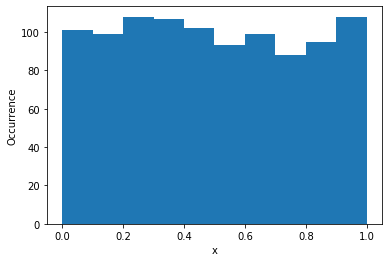

In [9]:
N = 1000
random.seed(0)
x = random.rand(N)

plt.hist(x)
plt.xlabel('x')
plt.ylabel('Occurrence');

### Histogram options in Matplotlib
The [`hist`](https://matplotlib.org/3.0.3/api/_as_gen/matplotlib.pyplot.hist.html) routine provides options to control several aspects of the histogram appearance, which you can review using the online help or by printing the *docstring* for `hist`,  as shown in the code cell below.

#### Programming notes 5
To get help on just about any Python expression (not just functions), just type the expression followed immediately (no space) by a question mark `?`. In the instance below, you will see the following elements:
* `Signature`, which specifies all of the input arguments;
* `Docstring`, which is the documentation string included by the authors of `hist`;
* `File`, which gives the full path to the file that contains `hist`; and
* `Type`, the object type for `hist`.

One of the optional input arguments in the signature is `**kwargs`, short for [*keyword arguments*](https://docs.python.org/3/tutorial/controlflow.html#keyword-arguments), which in this case can refer to lower-level [matplotlib.patches.Patch](https://matplotlib.org/api/_as_gen/matplotlib.patches.Patch.html) properties. The default behavior for `hist` is not to draw boundaries around each bar, but it is often preferable to include them. This can be done with the `edgecolor` keyword, which can be abbreviated as `ec`.

In [20]:
plt.hist?

### Alternative histograms of `rand`
We explore some of the more common options for `hist` in the cells below.

The first option, `bins`, lets us adjust the bin size. The documentation provides a couple of different options within this option. First, it says,

> If an integer is given, bins + 1 bin edges are calculated and returned, consistent with numpy.histogram.

The cell below creates a histogram  with 20 bins. Note that for fixed `N`, the number of occurrences within each bin decreases as the bin number increases, so that the total number of occurrences is constant.

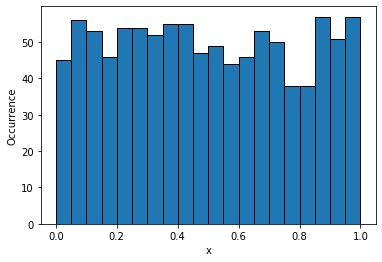

In [21]:
N = 1000
random.seed(0)
x = random.rand(N)

plt.hist(x, bins=20, ec='k')
plt.xlabel('x')
plt.ylabel('Occurrence');

The next section of the docstring for `bins` says,

> If bins is a sequence, gives bin edges, including left edge of first bin and right edge of last bin. In this case, bins is returned unmodified.

This statement is followed by an example, along with some information about string options such as 'auto', 'sturges', 'fd', etc., that can be assigned to `bins` to select among different automatic methods for determining the bin sizes.

The cell below creates a histogram with bin edges at 0.0, 0.1, ..., 1.0. (Note that `arange` does not include the stop value in the interval, so we set it to be above 1.0, at 1.05.)

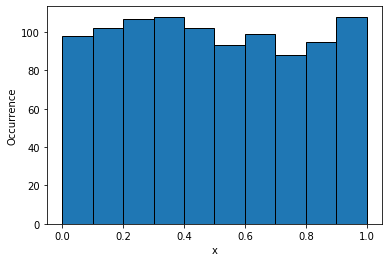

In [22]:
N = 1000
random.seed(0)
x = random.rand(N)
edges = np.arange(0.0, 1.05, 0.1)

plt.hist(x, bins=edges, ec='k')
plt.xlabel('x')
plt.ylabel('Occurrence');

The documentation also says that we can use nonuniform bins. The cell below sets the bin edges to \[0.0, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0\]. Note that the bin *areas* are no longer proportional to the number of occurrences when we do this, which produces an erroneous impression of the distribution. Use this option with care!

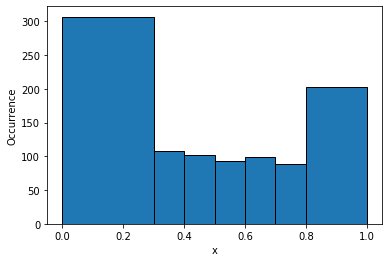

In [23]:
N = 1000
random.seed(0)
x = random.rand(N)
edges = [0.0, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]

plt.hist(x, bins=edges, ec='k')
plt.xlabel('x')
plt.ylabel('Occurrence');

Now let's look at some of the other options. The `range` option, for example, allows you to manually select the minimum and maximum values for the bins. The default is `None`, which causes the range to be determined automatically from the data. When specified, the documentation indicates that must be passed as a [*tuple*](https://docs.python.org/3/tutorial/datastructures.html#tuples-and-sequences), which must be enclosed by parentheses.

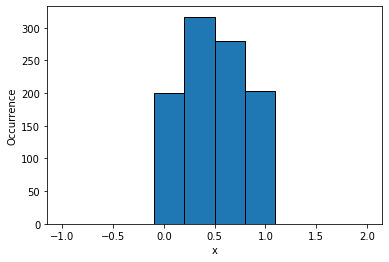

In [24]:
N = 1000
random.seed(0)
x = random.rand(N)

plt.hist(x, range=(-1.0, 2.0), ec='k')
plt.xlabel('x')
plt.ylabel('Occurrence');

The next option is `density`, which takes boolean values `True` or `False`. The default is `False`. When set to `True`, it normalizes the vertical axis so that the area of the histogram is equal to one.

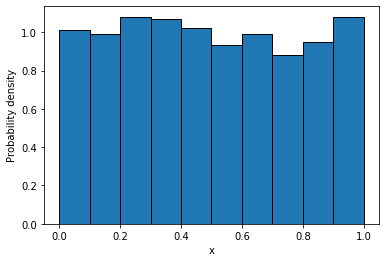

In [25]:
N = 1000
random.seed(0)
x = random.rand(N)

plt.hist(x, density=True, ec='k')
plt.xlabel('x')
plt.ylabel('Probability density');

We can set multiple options by separating them with commas.

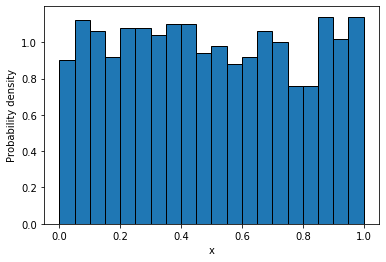

In [26]:
N = 1000
random.seed(0)
x = random.rand(N)

plt.hist(x, bins = 20, density=True, ec='k')
plt.xlabel('x')
plt.ylabel('Probability density');

### Exercise 3
Create a histogram of 1000 samples from `rand` that uses 100 bins, horizontal bars, and appropriately labeled axes. Normally it would be reasonable to just cut and paste from elsewhere in this notebook for some of the code, but you should type the expressions yourself to develop familiarity with them.

In [17]:
# Code cell for Exercise 3
# Use this cell for your response, adding cells if necessary.

### Exercise 4
Use `rand` and `hist` to produce a histogram of 1000 random numbers that are uniformly distributed on the interval \[-1.0,1.0).
*Hint:* If you have trouble producing the right interval, see the documentation for the [random](https://docs.scipy.org/doc/numpy-1.16.1/reference/generated/numpy.random.random.html) function.

In [18]:
# Code cell for Exercise 4
# Use this cell for your response, adding cells if necessary.

### Exercise 5
Use `rand` and `hist` to produce a histogram of 1000 random numbers, each of which is the sum of five random numbers that are uniformly distributed on the interval \[0.0, 1.0); that is,
$$ y_i = x_{i1} + x_{i2} + x_{i3} + x_{i4} + x_{i5},\quad i = \{0, 1, \ldots, 999\},$$
where each $x_{ij}$ is drawn from `rand`.

In [19]:
# Code cell for Exercise 5
# Use this cell for your response, adding cells if necessary.

## Summary
Here is a list of what you should be able to do after completing this notebook.
* Explain the basic principles of how computers generate random numbers.
* Describe what the seed of a random number generator is and why it is useful.
* Import the NumPy and Matplotlib libraries and use the `%matplotlib inline` magic command to display plots in a Jupyter notebook.
* Use `zeros` from NumPy to initialize an array.
* Use `arange` from NumPy to create an array of equally distributed values.
* Construct a basic `for` loop.
* Use  `rand` from NumPy to produce uniformly distributed random numbers on the interval \[0.0, 1.0).
* Use `plot` and `hist` from Matplotlib to produce basic *x*-*y* plots and histograms.
* Get help on Python functions.
* Use Python documentation to identify and set optional arguments to functions.

## Further reading<a name="Refs"></a>
<a name="Knuth"></a>Donald E. Knuth, [The Art of Computer Programming, volume 2: Seminumerical Algorithms](https://sfu-primo.hosted.exlibrisgroup.com/permalink/f/15tu09f/01SFUL_ALMA51188956220003611), provides a comprehensive and mathematical review of random number generation. The third edition was published in 1997, so it does not discuss the [Mersenne Twister](https://en.wikipedia.org/wiki/Mersenne_Twister) algorithm, which was published the same year.

<a id="NR"></a> W. H. Press, S. A. Teukolsky, W. T. Vetterling, and B. P. Flannery, [Numerical Recipes](http://numerical.recipes/). [Chapter 7](http://apps.nrbook.com/empanel/index.html?pg=340) includes more abbreviated discussion of random number generator algorithms.

<a id="Khan"></a>Khan Academy, [Random vs. pseudorandom number generators](https://www.khanacademy.org/computing/computer-science/cryptography/crypt/v/random-vs-pseudorandom-number-generators), for a video overview in less than seven minutes.

<a id="WikiRNGlist"></a>Wikipedia, [List of random number generators](https://en.wikipedia.org/wiki/List_of_random_number_generators).

<a id="Random"></a>[RANDOM.ORG](https://www.random.org/) A website that provides *true* random numbers generated from atmospheric fluctuations.